In [8]:
library(DBI)
library(ggplot2)
library(tidyverse)

In [9]:
mytheme <- function() {
  return(theme_bw() +
           theme(
             # NOTE: UNCOMMENT WHEN RENDING PLOTS FOR THE PAPER
             # (can't get the CM fonts to work in artifact VM...)
             text = element_text(family = "Times", size=10),
              # panel.grid.major = element_blank(),
             # panel.grid.minor = element_blank(),
             # panel.grid.major = element_line(colour="gray", size=0.1),
             # panel.grid.minor =
             #  element_line(colour="gray", size=0.1, linetype='dotted'),
            #  axis.ticks = element_line(size=0.05),
            #  axis.ticks.length=unit("-0.05", "in"),
            #  axis.text.y = element_text(margin = margin(r = 5)),
            #  axis.text.x = element_text(hjust=1),
             legend.key = element_rect(colour=NA),
             legend.spacing = unit(0.001, "in"),
             legend.key.size = unit(0.2, "in"),
             legend.title = element_blank(),
             legend.position = c(0.75, .7),
             legend.background = element_blank()))
}

mysave <- function(filename) {
  ggsave(filename, width=4, height=3, units=c("in"))
}

In [10]:
con <- dbConnect(
    RPostgres::Postgres(),
    dbname = 'npm_data', 
    user = 'data_analyzer',
)

In [11]:
df <- dbGetQuery(con, "
    select v.created, d.downloaded_at, extract(epoch from d.downloaded_at - v.created) as delay_secs from downloaded_tarballs d join versions v on v.tarball_url = d.tarball_url
")

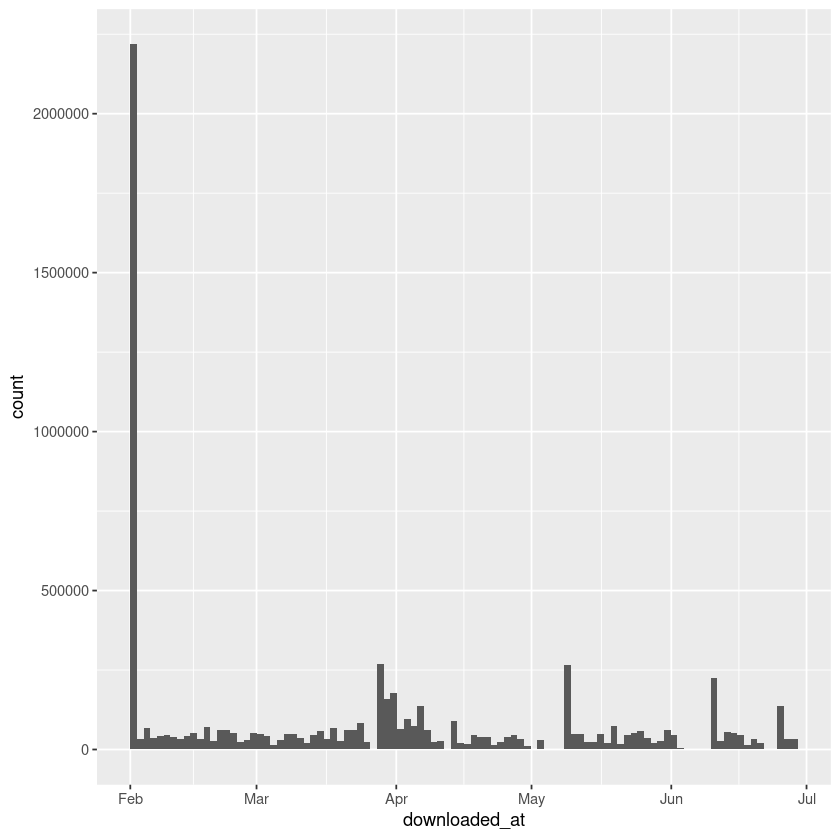

In [82]:
df %>% filter(downloaded_at > '2023-01-01 12:10:20') %>% ggplot(aes(x=downloaded_at)) + geom_histogram(bins=100)

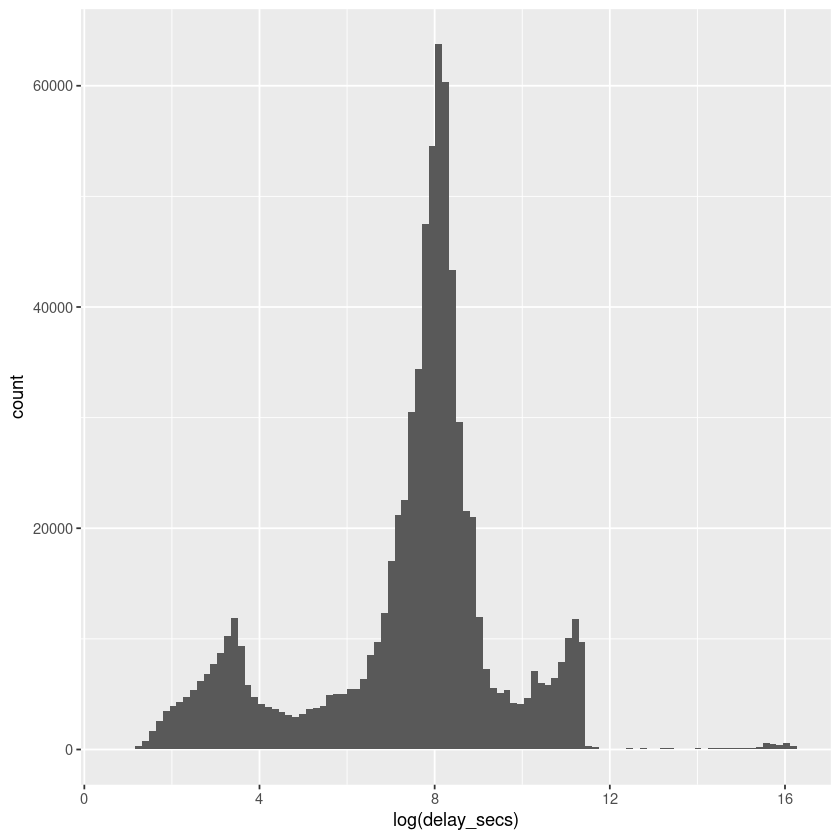

In [127]:
df %>% filter(created > '2023-02-15 00:00:00' & created < '2023-03-15 00:00:00' & delay_secs > 0) %>% ggplot(aes(x=log(delay_secs))) + geom_histogram(bins=100)

In [126]:
df %>% filter(created > '2023-02-15 00:00:00' & created < '2023-03-15 00:00:00' & delay_secs > 0) %>% mutate(delay_hours=delay_secs / 60 / 60) %>% pull(delay_hours) %>% quantile(c(0.25, 0.5, 0.75, 0.9, 0.95, 0.99))

25%        50%        75%        90%        95%        99% 
 0.2778975  0.7661532  1.3143206  5.5114797 15.4456733 24.6222437

In [131]:
df %>% filter(created > '2023-02-15 00:00:00' & created < '2023-03-15 00:00:00' & delay_secs > 0) %>% mutate(delay_hours=delay_secs / 60 / 60) %>% filter(delay_hours <= 24) %>% nrow()

[1] 773417

In [132]:
df %>% filter(created > '2023-02-15 00:00:00' & created < '2023-03-15 00:00:00' & delay_secs > 0) %>% mutate(delay_hours=delay_secs / 60 / 60) %>% nrow()

[1] 782702